# Explicación de Redes Neuronales Recurrentes (RNN)

En este cuaderno, explicaremos cómo funcionan las Redes Neuronales Recurrentes (RNN), sus aplicaciones, limitaciones y cómo se comparan con otras arquitecturas como LSTM y Transformers.

## Objetivos
- Comprender el funcionamiento básico de una RNN.
- Explorar cómo las RNN procesan secuencias de datos, especialmente en tareas de texto.
- Discutir las limitaciones de las RNN y sus desafíos.
- Comparar las RNN con LSTM y Transformers.

## 1. Introducción a las RNN
Las RNN son un tipo de red neuronal diseñada para trabajar con datos secuenciales, como texto, series temporales o secuencias de video. Su estructura les permite recordar información de estados anteriores, lo que las hace útiles para tareas en las que el contexto importa.

### Funcionamiento básico de una RNN
En una RNN, la salida de una celda recurrente en un paso temporal es pasada como entrada a la celda en el siguiente paso. Esto permite que la red acumule información a medida que avanza por la secuencia. 

![Arquitectura básica de una RNN](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/2880px-Recurrent_neural_network_unfold.svg.png)

En la imagen, podemos ver cómo la misma celda se repite para cada paso en la secuencia, compartiendo los mismos pesos y acumulando el contexto a lo largo del tiempo.

## 2. Procesamiento de Secuencias en una RNN
Veamos un ejemplo de cómo una RNN procesa una secuencia de texto para predecir la siguiente palabra en la secuencia. Usaremos un conjunto simple de oraciones.


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
import numpy as np

# Datos de ejemplo
sentences = ["el gato juega", "el perro corre", "el perro juega", "el gato salta", "la luna brilla"]
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
max_sequence_len = max([len(x) for x in sequences])
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_len)

# Dividir en características (X) y etiquetas (y)
X, y = sequences[:, :-1], sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index)+1)

# Crear el modelo RNN
model_rnn = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_sequence_len-1),
    SimpleRNN(32),
    Dense(len(tokenizer.word_index)+1, activation='softmax')
])

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_rnn.summary()

/Users/sero/Documents/datascience_master/nat_language/workdir/ean_nlp_projects/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
tokenizer.word_index

{'el': 1,
 'gato': 2,
 'juega': 3,
 'perro': 4,
 'corre': 5,
 'salta': 6,
 'la': 7,
 'luna': 8,
 'brilla': 9}

In [19]:
sequences

array([[1, 2, 3],
       [1, 4, 5],
       [1, 4, 3],
       [1, 2, 6],
       [7, 8, 9]], dtype=int32)

### Entrenamiento de la RNN
Entrenamos el modelo con las secuencias anteriores.

In [20]:
# Entrenar el modelo
history_rnn = model_rnn.fit(X, y, epochs=200, verbose=1)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step - accuracy: 0.0000e+00 - loss: 2.3140
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 2.3034
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 2.2929
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 2.2824
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 2.2720
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2000 - loss: 2.2615
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2000 - loss: 2.2509
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2000 - loss: 2.2401
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2000 - loss: 2.2292
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4000 - loss: 2.2181
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4000 - loss: 2.2067
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accu

### Visualización del rendimiento
Mostramos las curvas de precisión y pérdida del modelo durante el entrenamiento.

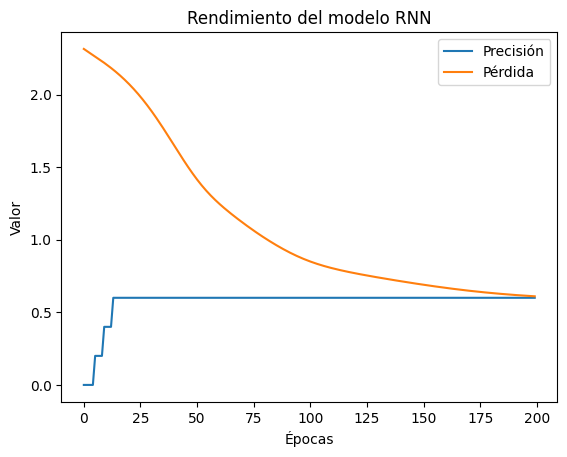

In [21]:
import matplotlib.pyplot as plt
# Graficar la precisión y la pérdida
plt.plot(history_rnn.history['accuracy'], label='Precisión')
plt.plot(history_rnn.history['loss'], label='Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Rendimiento del modelo RNN')
plt.legend()
plt.show()

In [26]:
## Predicción

# Crear una función para predecir la siguiente palabra

def predict_next_word(sentence):
    # Tokenizar la oración
    sequence = tokenizer.texts_to_sequences([sentence])[0]
    # Paddear la secuencia
    sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=max_sequence_len-1)
    # Predecir la siguiente palabra
    prediction = model_rnn.predict(sequence)
    # Obtener la palabra predicha
    predicted_word = tokenizer.index_word[np.argmax(prediction)]
    return predicted_word

# Probar la función

predict_next_word('el perro ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


'juega'

In [8]:
model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 2, 8)           │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,045 (19.71 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,364 (13.14 KB)

## 3. Limitaciones de las RNN
Las RNN enfrentan varios desafíos, entre ellos:
- **Desvanecimiento del gradiente**: A medida que la secuencia se hace más larga, las RNN tienen dificultades para recordar información de los primeros pasos, lo que limita su capacidad para manejar dependencias a largo plazo.
- **Paralelización**: Debido a la naturaleza secuencial de las RNN, es difícil paralelizar su entrenamiento, lo que las hace más lentas en comparación con otros modelos más recientes.


### Ejemplo de desvanecimiento de gradiente
Probemos con secuencias más largas para ver cómo afecta la precisión de las predicciones.

In [9]:
# Secuencias más largas
long_sentences = ["el gato juega en el jardín mientras el sol brilla", "la luna llena ilumina el cielo nocturno"]
long_sequences = tokenizer.texts_to_sequences(long_sentences)
long_sequences = tf.keras.preprocessing.sequence.pad_sequences(long_sequences, maxlen=max_sequence_len)

# Predicciones del modelo
predictions = model_rnn.predict(long_sequences)
predicted_words = [np.argmax(pred) for pred in predictions]
predicted_words_text = [list(tokenizer.word_index.keys())[list(tokenizer.word_index.values()).index(idx)] for idx in predicted_words]

print(f"Secuencias de entrada: {long_sentences}")
print(f"Palabras predichas: {predicted_words_text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Secuencias de entrada: ['el gato juega en el jardín mientras el sol brilla', 'la luna llena ilumina el cielo nocturno']
Palabras predichas: ['corre', 'brilla']


## 4. Comparación con LSTM y Transformers
Las LSTM y GRU son variantes de las RNN que abordan algunos de estos problemas, como el desvanecimiento del gradiente. Los Transformers, por otro lado, eliminan completamente la dependencia secuencial, lo que permite un procesamiento paralelo y mayor eficiencia.

### LSTM
Las LSTM utilizan celdas de memoria y puertas de entrada, olvido y salida para decidir qué información mantener o desechar. Esto les permite manejar dependencias a largo plazo de manera más efectiva.

### Transformers
Los Transformers utilizan mecanismos de atención que permiten a cada posición en una secuencia de entrada relacionarse directamente con cualquier otra posición, eliminando la necesidad de procesar los datos en orden secuencial.

En un cuaderno futuro, implementaremos estas variantes para comparar su rendimiento con las RNN.